# Presentation Pyclient 

## 1) Objective 
The pyclient is a framework developed in python to retrieve data from a Braincube. These data are then used by data-scientists to perform all kinds of independent analysis of Braincube.

**Here is the class diagram:**

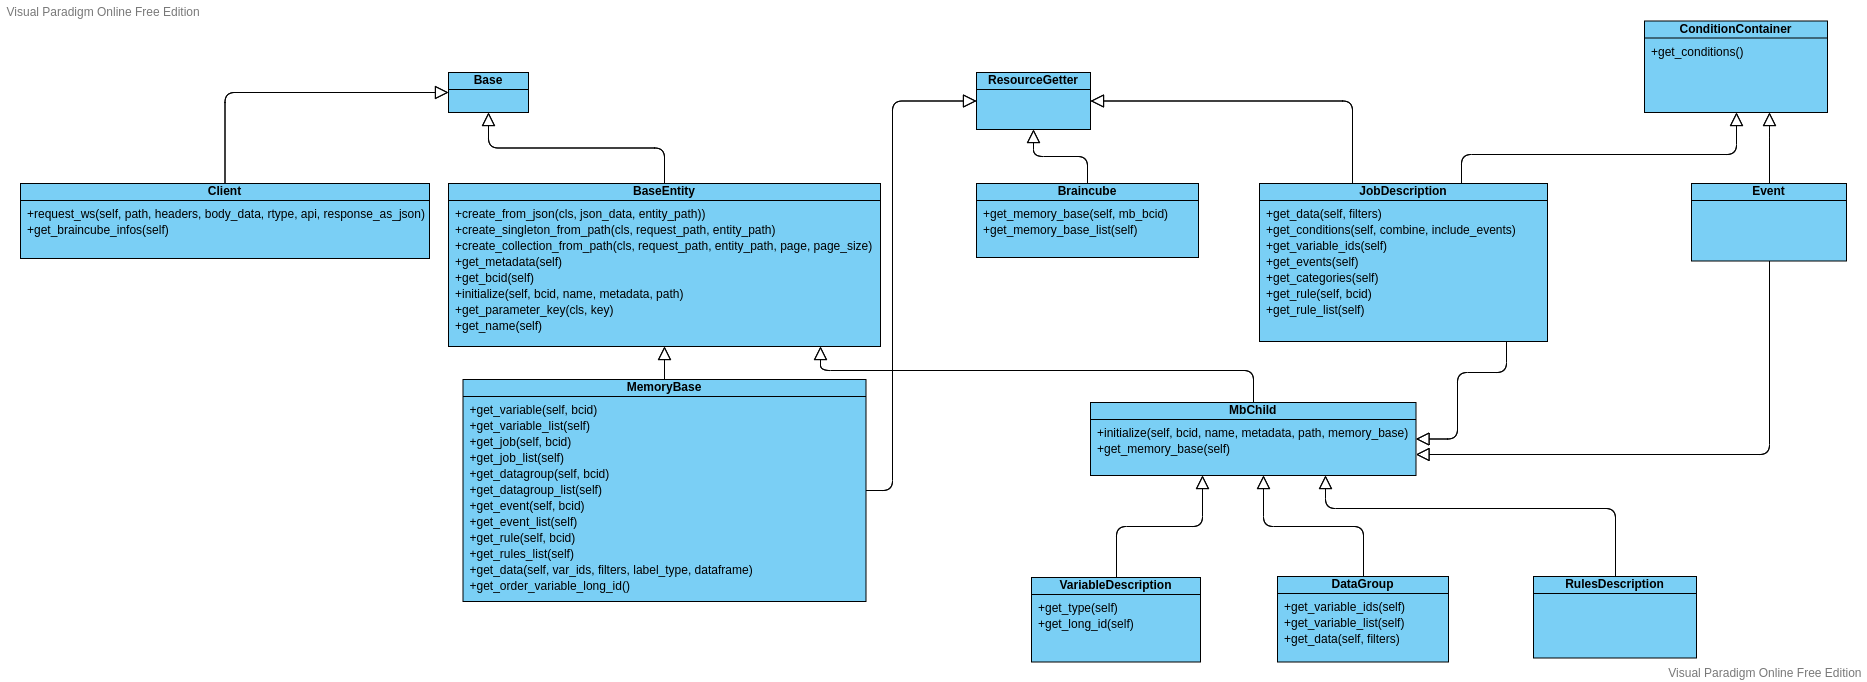

## 2) Import

In [ ]:
from braincube_connector import client, braincube

## 3) Configuration
Creating a config object allows to indicate to the Pyclient the domain of the braincube targeted by the data extraction (`domain`) as well as the API key created in the Braincube account parameters (`api_key`).

In [ ]:
config = {
    "domain": "mybraincube.com",
    "api_key": "<my_personal_access_token>",
}

The key can also be put in a config.json in the local directory or in the file `~/.braincube/config.json`.

Here's how to create an api key:
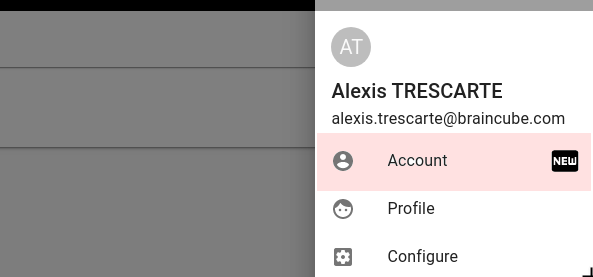

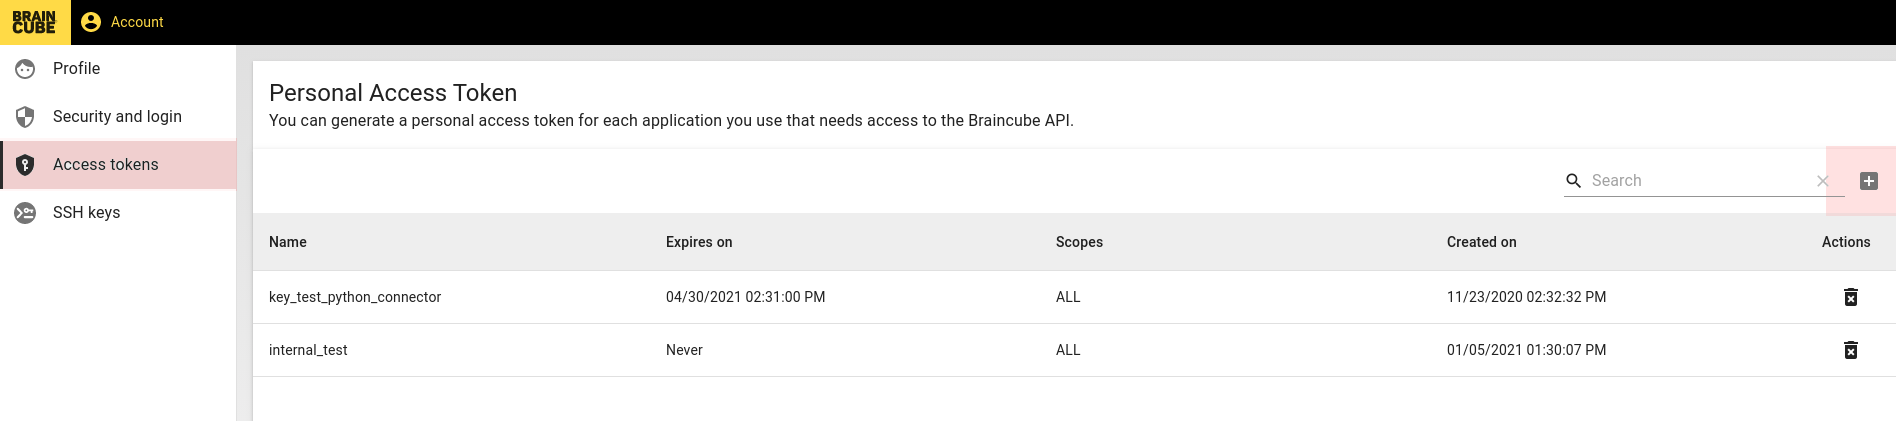

***The necessary scopes are: `SSO_READ` and `BRAINCUBE`***

## 4) Recovery of instances

Retrieving the instances related to the domain specified in the config object

client.get_instance(config_dict=config)

In [ ]:
client.get_instance(config_file="config.json")

## 5) Braincube recovery

Recovery of the Braincube targeted by extraction

In [ ]:
bc = braincube.get_braincube("demo")

## 6) Memorybase Recovery

In [ ]:
all_memory_base = bc.get_memory_base_list()
#print(all_memory_base)

## 7) Recovery of the targeted MemoryBase

Retrieving the targeted MemoryBase using its id

In [ ]:
mb = bc.get_memory_base(20)
print(mb)

## 8) Recovery of variables stored in the MemoryBase

Retrieving the list of all the variables present in the MemoryBase

In [ ]:
var_list = mb.get_variable_list()
print(var_list[0])

## 9) Retrieving information from a variable

In [ ]:
var = var_list[0]
var_name = var.get_name()
var_bcid = var.get_bcid()

print('name : {} | bcid : {}'.format(var_name, var_bcid))

## 10) Retrieving data from a variable

### A- Create a filter :
Create a filter allows you to filter the data you want to recover, these can be of 7 different types:

- **Equals to**  
  Select a data when the variable is equal to...
  ```json
  {
    "EQUALS": [ "mb20/d2000002", 2.0]
  }
  ```
  
- **Between**  
  Select a data when the variable is between...
  ```json
  {
    "BETWEEN": [ "mb20/d2000003", -1, 1]
  }
  ```
  
- **Lower than**  
  Select a data when the variable is smaller than...
  ```json
  {
    "LESS": [ "mb20/d2000003", 10]
  }
  ```


- **Greater than**  
  Select a data when the variable is larger than...
  ```json
  {
    "GREAT": [ "mb20/d2000003", 10]
  }
  ```
  
- **Not:**  
  Select a data when the variable is does not include the next filter.
  ```json
  {
    "Not": [{"filter":...}]
  }
  ```

- **And gate**  
  Filters can be added using AND.
  ```json
  {
    "AND": [{"filter1":...}, {"filter2":...}]
  }
  ```



- **Or gate:**  
  Filters can be combined using OR.
  ```json
  {
    "OR": [{"filter1":...}, {"filter2":...}]
  }
  ```

In [ ]:
my_filters = [{"BETWEEN": ["mb20/d2000002",0,1]},{"BETWEEN": ["mb20/d2000003", -1, 1]}]

### B- In dictionary form :

In [ ]:
data = mb.get_data(["2000077"], filters=my_filter)
print(data)

### C- In the form of DataFrame pandas :

We can use the `dataframe` parameter of `get_data()` being a boolean indicating if the desired return is a DataFrame or not.

In [ ]:
data = mb.get_data(["2000077"], filters=my_filters, dataframe=True)
print(data)

### D- Changing the label of the data
The `get_data()` function proposes a parameter called `label_type` taking the value `"name"` or `"bcid"`. This parameter allows you to change the label of the returned data.

In [ ]:
data = mb.get_data(["2000001", "2000034"], filters=my_filters, label_type="name", dataframe=True)
print(data)

## 11) Parameters 

The parameters are available in the parameter class of the braincube_connector. They are used to customize certain values of the braincube_connector.

In [ ]:
from braincube_connector import parameters

Changing the pagination of a query 

In [ ]:
parameters.set_parameter({"page_size": 10})

Parsing dates in python's Datetime format

In [ ]:
parameters.set_parameter({"parse_date": True})

The Braincube database stores 3 names (`tag`, `standard`, or `local`) for a variable.
By default, `standard` is used but you can change it with `parameters` :

In [ ]:
parameters.set_parameter(({"VariableDescription_name_key": "tag"}))

In [ ]:
data = mb.get_data(["2000001", "2000034"], filters=my_filter, label_type="name", dataframe=True)
print(data)